### Step 95	
Open a python file or jupyter notebook, import the required modules (Supplementary Code 1, Box 1). In addition to common scientific libraries, import utils.py (provided along with our code package), which contains elementary data processing functions.

In [1]:
from acquisitionExtended import * #processing data class and dependencies

#just for style
display(HTML("<style>.container { width:80% !important; }</style>"))
plt.style.use('dark_background')

#warnings are disabled in thoroughly tested code to improve legibility
import warnings
warnings.filterwarnings("ignore")

### Step 96
To organize the file structure returned by the HyperspectralConfocal software into correct spatial, spectral, and temporal axes, a custom data structure called the acquisition class is used. It stores key acquisition parameters and contains data processing methods, which can directly access the acquisition parameters relevant for correct processing. Any data processing workflow starts by creating an instance of the acquisition class. Call the constructor of the acquisition class, using the name of the directory and the data set as inputs (Supplementary Code 1, Box 2). 
? TROUBLESHOOTING

In [2]:
directoryName='Z:\\Data for Setup Paper\\20220224\\'
logName='Log_2022-02-24_05-05PM.txt'
dataName='FluoRed_Area1_25kHz_10x_1200lmmat600_1nJ'
Scan25kHz=acquisition(directoryName, dataName)

### Step 97
Calibrate the acquisition by calling the autoCalibrate method, which takes the name of the log file as the first argument, and the scan field size of your objective at ±50V (the number determined during Step 72, in µm) as the second argument (Supplementary Code 1, Box 3).

In [3]:
FOV50=1733.85 #measured scan field size for +-50V
Scan25kHz.autoCalibrate(logName, FOV50=FOV50)
print('Attributes: ', list(Scan25kHz.__dict__.keys()))
print('The pixel size of {} is {} um x {} um.'.format(Scan25kHz.name, round(Scan25kHz.xStep,2), round(Scan25kHz.yStep,2)))

Attributes:  ['name', 'directory', 'xDim', 'yDim', 'zDim', 'tDim', 'xStep', 'yStep', 'zStep', 'tStep', 'xaxis', 'wLDim']
The pixel size of FluoRed_Area1_25kHz_10x_1200lmmat600_1nJ is 3.47 um x 3.47 um.


### Step 98
You can also access and change all attributes of the acquisition directly, which also allows overwriting the automatic calibration and uploading data sets from different cameras (Supplementary Code 1, Box 4). 

In [4]:
directoryStack='Z:\\Data for Setup Paper\\20220921\\'
nameStack='FluoRed_DIW_SmallFibre_1200lmmAt600_OD06'
ScanStack=acquisition(directoryStack, nameStack, x0=300, y0=300, z0=12, dZ=10, grating=1, wLC=600, wL0=2048)
#manually calculate the correct pixel size for spatial calibration of a +-45V Scan with 400 pixels
ScanStack.xStep=FOV50/50*30/300
ScanStack.yStep=FOV50/50*30/300

print('The voxel size of {} is {} um x {} um x {} um.'.format(ScanStack.name, round(ScanStack.xStep,2), round(ScanStack.yStep,2), round(ScanStack.zStep,2)))
print('Wavelengths from {} nm to {} nm were measured.'.format(round(ScanStack.xaxis[-1],2), round(ScanStack.xaxis[0],2)))

The voxel size of FluoRed_DIW_SmallFibre_1200lmmAt600_OD06 is 3.47 um x 3.47 um x 10 um.
Wavelengths from 586.27 nm to 613.79 nm were measured.


### Step 99
Create hyperspectral images of individual x-y-planes with the construct2D method. For this, you need to specify the planes in z and t from which you want to extract the 2D image. The default version of this function creates an intensity image of the destination plane, which is displayed as one of two panels in a figure, and it returns the intensity counts as a 2D numpy array.

### Step 100
Optionally, the method can display and return an additional image containing the positions of the dominant lasing peaks (Supplementary Code 1, Box 5). Additional keyword arguments allow adjusting thresholds and color scaling of the results (Supplementary Note 3).

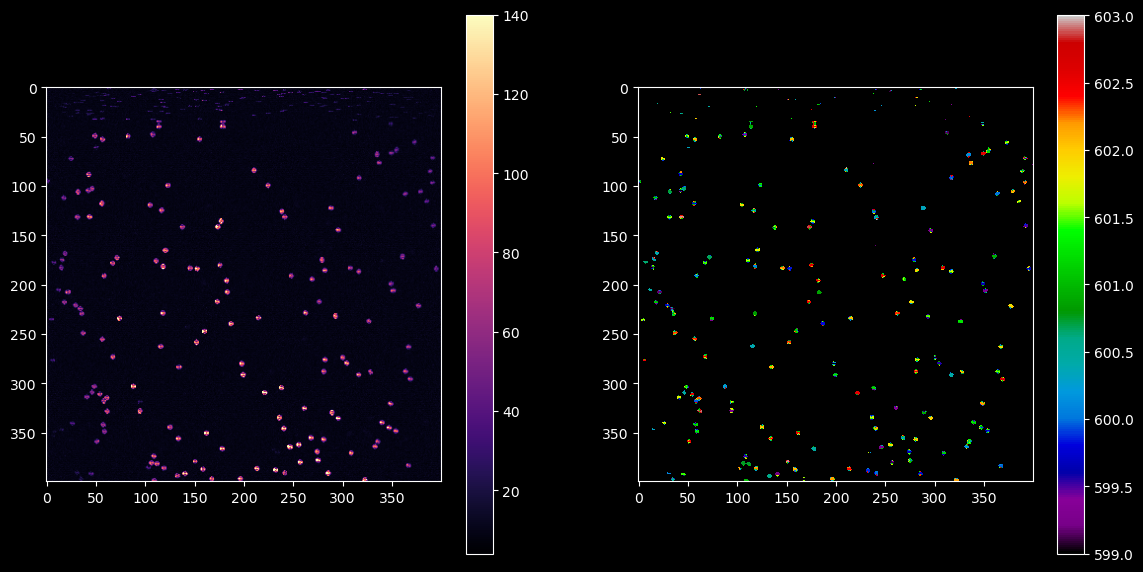

In [5]:
#define a spectral window for the hyperspectral colorspace
s01=np.max(np.where(Scan25kHz.xaxis>603)) #look at wavelengths below 603 nm only for the spectral color-coding
s02=np.min(np.where(Scan25kHz.xaxis<599)) #look at wavelengths above 599 nm only for the spectral color-coding
#set z and t to extract 2D map from
z0=0
t0=0
imap, maxmap = Scan25kHz.construct2D(t=t0, z=z0, threshold=12, save=False, s1=s01, s2=s02, show=True, specImg=True, scaleVal=140)

### Step 101
To extract a single spectrum, determine the x-y position of the pixel of interest at a certain timestep and z-plane. 

### Step 102
Call the getSingleSpectrum method, using x, y, z, and t as inputs. This method will retrieve the spectrum at the designated position from the original data set and return it as a numpy array, which can optionally be saved as a text file at a specified file path (Supplementary Code 1, Box 6).

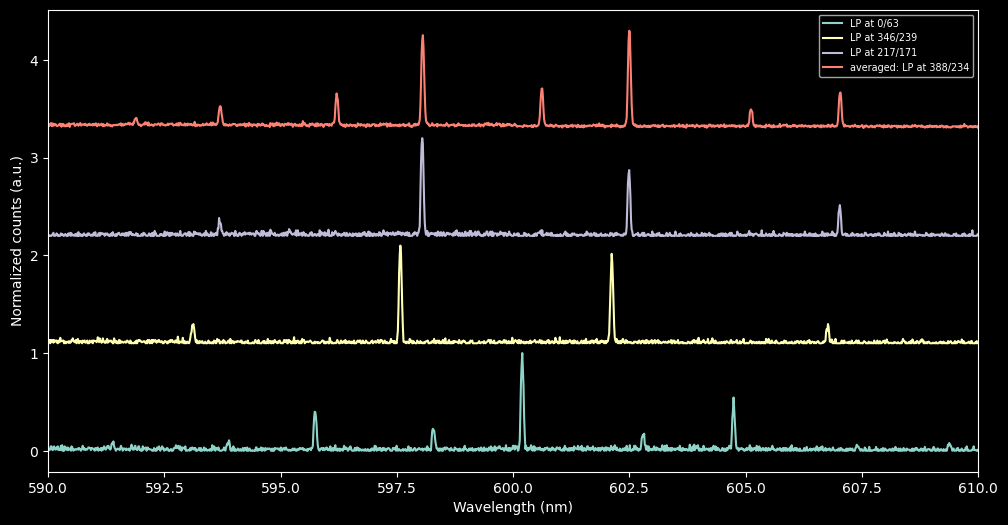

In [6]:
#find some bright pixels to extract the spectrum from
x, y = np.where(imap>150) 
#extract some random spectra
x0=x[1]
y0=y[1]
spec0 = Scan25kHz.getSingleSpectrum(x0, y0, z0, t0, save=True, pathSave=Scan25kHz.directory+Scan25kHz.name+'_spectrum_x{}_y{}_z{}_t{}.txt'.format(x0, y0, z0, t0))
x0=x[50]
y0=y[50]
spec1 = Scan25kHz.getSingleSpectrum(x0, y0, z0, t0, save=True, pathSave=Scan25kHz.directory+Scan25kHz.name+'_spectrum_x{}_y{}_z{}_t{}.txt'.format(x0, y0, z0, t0))
x0=x[18]
y0=y[18]
spec2 = Scan25kHz.getSingleSpectrum(x0, y0, z0, t0, save=True, pathSave=Scan25kHz.directory+Scan25kHz.name+'_spectrum_x{}_y{}_z{}_t{}.txt'.format(x0, y0, z0, t0))
#additionally, one can retrieve spectra from a small region of an arbitrary size, centered around the specified position
averagedSpec2=Scan25kHz.getSingleSpectrumIntegrated(x0, y0, z0, t0, tol=4, thresh=15, save=False)
#plot all results
plt.figure(figsize=(12,6))
plt.plot(Scan25kHz.xaxis, spec0/np.max(spec0), label='LP at {}/{}'.format(x[1], y[1]))
plt.plot(Scan25kHz.xaxis, spec1/np.max(spec1)+1.1, label='LP at {}/{}'.format(x[50], y[50]))
plt.plot(Scan25kHz.xaxis, spec2/np.max(spec2)+2.2, label='LP at {}/{}'.format(x[18], y[18]))
plt.plot(Scan25kHz.xaxis, averagedSpec2/np.max(averagedSpec2)+3.3, label='averaged: LP at {}/{}'.format(x[80], y[80]))
plt.legend(loc='upper right', fontsize='x-small')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized counts (a.u.)')
plt.xlim(590, 610)
plt.show()

### Step 103
Multidimensional, pre-processed data sets can be displayed in the interactive python viewer napari. Process the stack or time series, using the construct3D or constructT methods for obtaining intensity images, or the constructSpec3D or constructSpecT methods for spectral color-coding (Supplementary Code, Box 7). 

In [7]:
stackI, stackM = ScanStack.constructSpec3D(t=0, s1=s01, s2=s02, threshold=20)

### Step 104
To display intensity images, directly load them into the napari viewer, passing the correct spatial calibration, which is stored in the acquisition object, into the napari function call (Supplementary Code, Box 8). 

In [8]:
#specify rotation and scaling for displaying the stack
rot=[30, 0, 0]
scale0=[ScanStack.zStep, ScanStack.yStep, ScanStack.xStep]
Lim=[20,4000]
#create a viewer window and load the data
viewer=napari.view_image(stackI[:,100:250], colormap='magma', interpolation='nearest', blending='additive', contrast_limits=Lim, scale=scale0, rotate=rot, ndisplay=3 )
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"

### Step 105
To display spectral data, apply the custom RGBA mapping to the processed images. This method encodes the spectral information as hue in three different color channels, with the brightness corresponding to the real intensity values.

### Step 106
Display the resulting ND-RGBA channels in napari, and apply the correct spatial scaling as described for the intensity images above (Supplementary Code, Box 9). 

In [9]:
#apply the RGBA mapping with specified bounds
R, G, B = utils.VAtoRGBA(stackM, stackI/3, ScanStack.xaxis[s02], ScanStack.xaxis[s01])

#load the color-channels into napari
Lim=[0,500]
viewer=napari.view_image(R[:,20:300], colormap='red', interpolation='nearest', blending='additive', contrast_limits=Lim, scale=scale0, rotate=rot, ndisplay=3 )
viewer.add_image(G[:,20:300], colormap='green', interpolation='nearest', blending='additive', contrast_limits=Lim, scale=scale0, rotate=rot )
viewer.add_image(B[:,20:300], colormap='blue', interpolation='nearest', blending='additive', contrast_limits=Lim, scale=scale0, rotate=rot )
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"

### Step 107
To store the processed images, save screenshots of the viewer window by defining the path of the saved image.

### Step 108
To save a series of images, e.g., to create videos of time series or flyovers, create a loop that iterates over different timesteps and/or angles, saving an image at each iteration (Supplementary Code, Box 10).

In [10]:
Lim=[0, 500]
#create a fly-over loop
for j in range(0, 180, 2):
    rot=[30+j/3, 0, j] #specify an angle of rotation that is changing with each iteration
    viewer=napari.view_image(R[:,20:300], colormap='red', interpolation='nearest', blending='additive', contrast_limits=Lim, scale=scale0, rotate=rot, ndisplay=3 )
    viewer.add_image(G[:,20:300], colormap='green', interpolation='nearest', blending='additive', contrast_limits=Lim, scale=scale0, rotate=rot )
    viewer.add_image(B[:,20:300], colormap='blue', interpolation='nearest', blending='additive', contrast_limits=Lim, scale=scale0, rotate=rot )
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.camera.zoom=0.5
    #export the data and close the viewer
    viewer.window.screenshot(ScanStack.directory+ScanStack.name+'Maxmap_View{}.tif'.format(j))
    viewer.close()